# Objectives
In this code, the exported data for aruco-board and cautery pen's tip location is analyzed.
The data is stored in the "output" folder. Following are the general objectives:
* Basic EDA of both the DFs.
* Assess if dataset claning is necessary
* Produce some sample images and data of tip location detection anomally.
* Mean and STD of distance variation between tip and board location for each frame where both were detected
* Mean and STD of board location.
*  Mean and STD of tip location.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Data: Input_1
Folloing are samples of the aruco and tip location data we have. The (x,y,z) coordinate corresponds to the camera coordinate system. Following is the cooridnate system used in opencv. In the data, the Frame column represents the frame number at which the readings were made. All units in the data are in cm.

<img src="https://docs.opencv.org/2.4/_images/pinhole_camera_model.png">

In the data capture system, the camera was fixed on a rig. The aruco baord was also fixed and was not moved during the video capture. Only the hand containing the pen was moved while keeping the tip of the pen exactly on the tracked point of the aruco board. In every frame of the videos, both hand and the board were sumltaneously present.

In [2]:
excel_file_name = "input_1.xlsx"
excel_folder_name = "output"
excel_file_path = "./" + excel_folder_name + "/" + excel_file_name
tip_locs = pd.read_excel(excel_file_path, sheet_name = "tip_locs")
board_locs = pd.read_excel(excel_file_path, sheet_name = "board_locs")

In [3]:
print("Some samples of board_locs:")
board_locs.head()

Some samples of board_locs:


,Frame,x,y,z
0,0,-22.129578,17.644530,134.097071
1,1,-22.122394,17.680562,134.209414
2,2,-22.128505,17.649913,134.138091
3,3,-22.143928,17.619830,133.940205
4,4,-22.148921,17.608042,133.866430


In [4]:
print("Some samples of tip_locs: ")
tip_locs.head()

Some samples of tip_locs: 


,Frame,x,y,z
0,15,-17.196167,15.722184,113.815177
1,16,-15.903020,14.401599,101.866703
2,17,-15.490446,14.333447,100.806815
3,18,-14.604812,12.420842,90.722237
4,19,-14.591520,12.270892,90.416883


## Basic EDA
First lets het a general idea of data for input_1.
### Board Location EDA
Following is the basic EDA of aruco board data.  
Mean is \[-21.622195	17.672194	134.060638\].  
Std is \[0.250231	0.031129	0.126895\].  
It seems like the board's location is pretty stable. The maximum std is only 0.25 cm along the x axis.

In [5]:
print("Basic board location data stats: ")
board_locs.describe()

Basic board location data stats: 


,Frame,x,y,z
count,86.000000,86.000000,86.000000,86.000000
mean,42.500000,-21.622195,17.672194,134.060638
std,24.969982,0.250231,0.031129,0.126895
min,0.000000,-22.160250,17.571699,133.810485
25%,21.250000,-21.554632,17.650362,133.950863
50%,42.500000,-21.531813,17.671390,134.078076
75%,63.750000,-21.515445,17.692262,134.143335
max,85.000000,-21.376418,17.744654,134.312170


### Tip Location EDA
Following is the basic EDA of tip location data.  
From the data, location mean is = \[13.910249	12.525607	90.465666\]  
std is \[0.752575	0.653740	4.770839\]  
From std information it seems that unlike x and y axis, the tip location estimation has a quite high standard deviation along the z axis. z axis points away from the camera. z axis std is about 5 cm.

In [6]:
print("Basic tip_locs stats: ")
tip_locs.describe()

Basic tip_locs stats: 


,Frame,x,y,z
count,71.000000,71.000000,71.000000,71.000000
mean,50.000000,-13.910249,12.525607,90.465666
std,20.639767,0.752575,0.653740,4.770839
min,15.000000,-17.196167,12.114827,86.509090
25%,32.500000,-14.230434,12.234434,87.759909
50%,50.000000,-13.571756,12.279403,88.853304
75%,67.500000,-13.438292,12.361560,91.070788
max,85.000000,-13.202764,15.722184,113.815177


### Possible Anomalies in Tip Location Data
As DOPE isn't perfect, there might be several outliers affecting the above EDA. In this part let's look at some of this possible sources annomalies.

#### Duplicates in tip_locs
Frame number will be duplicates if in any frame two cubes were identified by dope. For input_1 it seems like there are no duplicates in "Frame" column.

In [7]:
dups = tip_locs["Frame"].duplicated()
print("Number of frames with more than one cube identified: {}".format(dups.sum()))


Number of frames with more than one cube identified: 0


#### Anomalous Detecion
Sometimes DOPE estimates other objects wrongly as the hand carrying the pen. I did keep the background as clean as possible to test in ideal conditions. However, there might be anomalies. Following are the plots of the coordinates in cm.

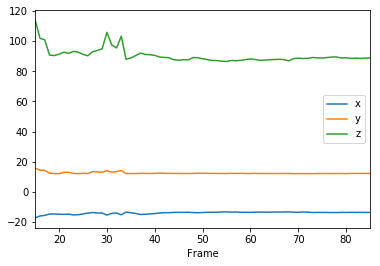

In [12]:
tip_locs.plot("Frame")

From the plot it seems that between frames 10-20, the z-axis jumps a bit, but other axis remains reltively unchanged. Which means there were possibly not anomalous detection. 

## Tip Tracking Validation
Let's now validate the tip localization. To do that, I will consider only those frames where both tip and board was identified.

In [9]:
common_board_locs = board_locs[board_locs.Frame.isin(tip_locs.Frame)] 
common_board_locs.describe()

,Frame,x,y,z
count,71.000000,71.000000,71.000000,71.000000
mean,50.000000,-21.514301,17.678431,134.072172
std,20.639767,0.090317,0.029560,0.130407
min,15.000000,-21.843715,17.571699,133.810485
25%,32.500000,-21.539916,17.663167,133.990819
50%,50.000000,-21.528681,17.674108,134.099235
75%,67.500000,-21.502575,17.697575,134.166841
max,85.000000,-21.376418,17.744654,134.312170


In [10]:
common_tip_locs = tip_locs[tip_locs.Frame.isin(board_locs.Frame)]
common_tip_locs.describe()

,Frame,x,y,z
count,71.000000,71.000000,71.000000,71.000000
mean,50.000000,-13.910249,12.525607,90.465666
std,20.639767,0.752575,0.653740,4.770839
min,15.000000,-17.196167,12.114827,86.509090
25%,32.500000,-14.230434,12.234434,87.759909
50%,50.000000,-13.571756,12.279403,88.853304
75%,67.500000,-13.438292,12.361560,91.070788
max,85.000000,-13.202764,15.722184,113.815177


The mean and STD of the difference between estimated board and tip locations are:

In [13]:
print("Mean:")
print(np.mean(common_board_locs[["x","y","z"]] - common_tip_locs[["x","y","z"]]))
print("\nSTD:")
print(np.std(common_board_locs[["x","y","z"]] - common_tip_locs[["x","y","z"]]))

Mean:
x    -7.881104
y     5.291018
z    44.825804
dtype: float64

STD:
x    0.440381
y    0.399958
z    3.505995
dtype: float64
